In [1]:
import pandas as pd

# Read csv into pandas DataFrame
df = pd.read_csv('train.csv')

print('The data consists of {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data consists of 595212 rows and 59 columns


In [2]:
# convert _bin and _cat to categorical variables
for col in df.columns:
    if col.endswith('_cat') or col.endswith('_bin'):
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float64
ps_re

In [7]:
# Seperate dataframe by numeric and categorical cols
df_numeric = df.select_dtypes(exclude=['category'])
df_cat = df.select_dtypes(include=['category'])

In [16]:
df_numeric.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,7,0,2,5,0,11,0.7,0.2,0.718070,2,...,1,10,1,10,1,5,9,1,5,8
1,9,0,1,7,0,3,0.8,0.4,0.766078,3,...,1,9,5,8,1,7,3,1,1,9
2,13,0,5,9,0,12,0.0,0.0,-1.000000,1,...,2,9,1,8,2,7,4,2,7,7
3,16,0,0,2,0,8,0.9,0.2,0.580948,1,...,4,7,1,8,4,2,2,2,4,9
4,17,0,0,0,0,9,0.7,0.6,0.840759,3,...,2,6,3,10,2,12,3,1,1,3


TypeError: slice indices must be integers or None or have an __index__ method

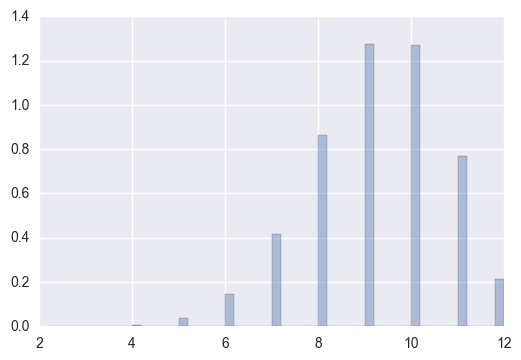

In [15]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
sns.distplot(df_numeric['ps_calc_08'])
sns.distplot(df_numeric['ps_calc_07'])
sns.distplot(df_numeric['ps_calc_06'])
sns.distplot(df_numeric['ps_calc_05'])
sns.distplot(df_numeric['ps_calc_04'])

In [ ]:
!pip install sklearn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_sc = scaler.fit_transform(df_numeric.drop(['id','target'],axis=1))

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import t_sne
pca = PCA()
# tsne = t_sne.TSNE(n_components=2)

In [8]:
X_pca = pca.fit_transform(X_num_sc)

In [30]:
pca_df = pd.DataFrame(X_pca,columns = ['pca_comp_{}'.format(i) for i in range(X_pca.shape[1])])

In [31]:
final_df = pd.concat([pca_df, df_cat],axis=1)

In [32]:
final_df.shape

(595212, 57)

In [35]:
final_df = pd.get_dummies(final_df)

In [36]:
final_df.shape

(595212, 244)

In [39]:
X = final_df
y = df_numeric['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [44]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

/Users/mehrco/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [45]:
clf.score(X_test,y_test)

0.96333367274208326

In [48]:
# Using Radial basis function kernal
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, random_state = 42)
X_features_train = rbf_feature.fit_transform(X_train)
X_features_test = rbf_feature.fit_transform(X_test)

In [49]:
clf2 = SGDClassifier()
clf2.fit(X_features_train, y_train)
clf2.score(X_features_test, y_test)

/Users/mehrco/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96333367274208326